## Perceptron and Pocket Algorithms

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
from copy import deepcopy
import warnings
warnings.filterwarnings('ignore')

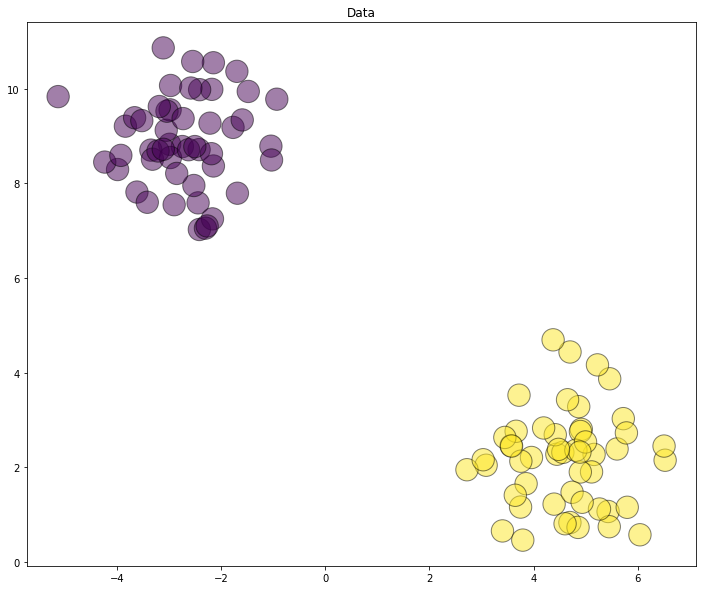

In [26]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                   random_state=42)

colors = y
plt.figure(figsize=(12,10))
plt.scatter(X[:, 0], X[:, 1], s=500,
                c=colors,
                alpha=0.5, edgecolor='k')
plt.title("Data");

In [ ]:
print(Perceptron.__doc__)

In [66]:
class Perceptron_(object):

    def __init__(self, no_of_inputs, epochs=10):
        self.epochs = epochs
        self.weights = np.zeros(no_of_inputs + 1)             
    
    def predict_single(self, feature, weight):
        summation = np.dot(feature, weight[1:]) + weight[0]
        if summation > 0:
            activation = 1
        else:
            activation = -1            
        return activation
    
    def predict(self, features):
        labels = []
        for row in range(features.shape[0]):
                feature = features[row,:]
                label = self.predict_single(feature, self.weights)
                labels.append(label)
                
        return np.asarray(labels)
        
    
    def fit(self, features, labels):
        for _ in range(self.epochs):
            for row in range(features.shape[1]):
                feature = features[row,:]
                label = labels[row]
                
                temp_weight = deepcopy(self.weights)
                prediction = self.predict_single(feature, self.weights)
                if (0 > prediction * labels[row]):                
                    temp_weight[1:] +=  label * feature
                    temp_weight[0] +=  label     
               
                self.weights = temp_weight

In [56]:
class Pocket(object):

    def __init__(self, no_of_inputs, epochs=10):
        self.epochs = epochs
        self.weights = np.zeros(no_of_inputs + 1)       
            
    def error(self, features, labels, weight):
        temp = []
        for row in range(features.shape[0]):
                feature = features[row,:]
                label = labels[row]
                
                predicted = self.predict_single(feature, self.weights)
                temp.append(int(predicted == label))
        
        return 1 - sum(temp) / len(temp)        
    
    def predict_single(self, feature, weight):
        summation = np.dot(feature, weight[1:]) + weight[0]
        if summation > 0:
            activation = 1
        else:
            activation = -1            
        return activation
    
    def predict(self, features):
        labels = []
        for row in range(features.shape[0]):
                feature = features[row,:]
                label = self.predict_single(feature, self.weights)
                labels.append(label)
                
        return np.asarray(labels)
        
    
    def fit(self, features, labels):
        smallest_error = np.Inf
        
        for _ in range(self.epochs):
            for row in range(features.shape[1]):
                feature = features[row,:]
                label = labels[row]
                
                temp_weight = deepcopy(self.weights)
                prediction = self.predict_single(feature, self.weights)
                if (0 > prediction * labels[row]):                
                    temp_weight[1:] +=  label * feature
                    temp_weight[0] +=  label
                    
                temp_error = self.error(features, labels, temp_weight)
                
                if temp_error < smallest_error: 
                    smallest_error = temp_error
                    self.weights = temp_weight

In [67]:
classifiers = [
    ("Perceptron_", Perceptron_(X.shape[1])),
    ("Perceptron", Perceptron(tol=1e-3)),
    ("Pocket", Pocket(X.shape[1])),
]

training Perceptron_
training Perceptron
training Pocket


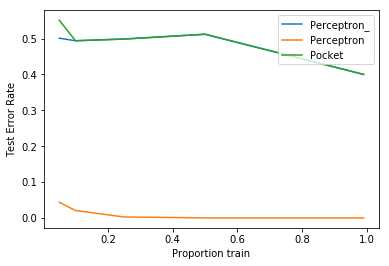

In [68]:
heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
rounds = 20
xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for _ in range(rounds):
            X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=i, random_state=rng)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)
    

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()